# Exploratory Data Analysis

This analysis focuses on the relationship between the number of injuries in fatal traffic accidents and various features: time (DAY_WEEK, HOUR), space (STATE, COUNTY, LATITUDE, LONGITUD), road conditions (ROUTE, FUNC_SYS, TYP_INT, REL_ROAD), and external factors (LGT_COND, WEATHER). Any internal structural correlation—such as those involving PEDS, VE_TOTAL, PERSONS, and FATALS—will also be explored to deepen understanding.

In [9]:
import warnings
warnings.filterwarnings('ignore')

## Time
#### Day of Week

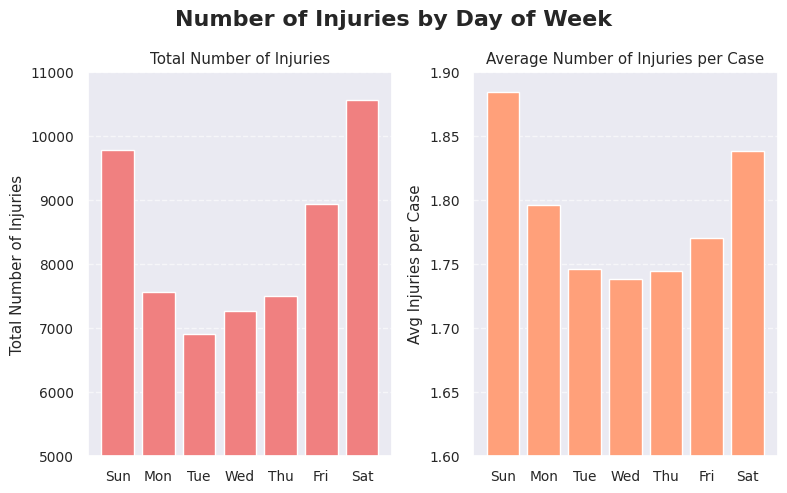

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load filtered data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Mapping number to week day
week_day = {1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri", 7: "Sat"}

df["DAY_NAME"] = df["DAY_WEEK"].map(week_day)

# Calculate total injuries per day
total_inju_by_day = df.groupby("DAY_NAME")["NUM_INJURED"].sum().reindex(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

# Calculate average injuries per case
avg_inj_day = df.groupby("DAY_NAME")["NUM_INJURED"].mean().reindex(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
# Total fatalities
axes[0].bar(total_inju_by_day.index, total_inju_by_day.values, color="lightcoral")
axes[0].set_title("Total Number of Injuries")
axes[0].set_ylabel("Total Number of Injuries")
axes[0].grid(False)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Mean fatalities
axes[1].bar(avg_inj_day.index, avg_inj_day.values, color="lightsalmon")
axes[1].set_title("Average Number of Injuries per Case")
axes[1].set_ylabel("Avg Injuries per Case")
axes[1].grid(False)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

axes[0].set_ylim(5000, 11000)
axes[1].set_ylim(1.6, 1.9)

fig.suptitle("Number of Injuries by Day of Week", fontsize=16, fontweight='bold')
plt.savefig("img/num_injuries_week.png", dpi=300, transparent=True)
plt.tight_layout()
plt.show()

#### Hour

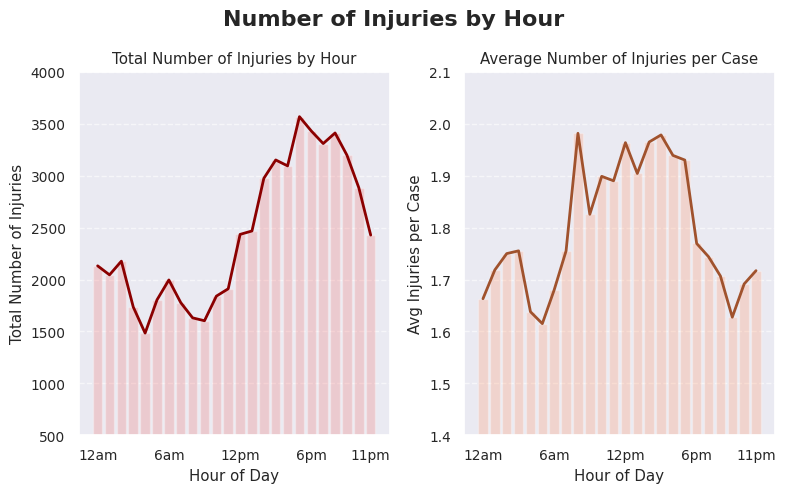

In [11]:
# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Group
total_injured_hour = df.groupby("HOUR")["NUM_INJURED"].sum()
avg_inj_hour = df.groupby("HOUR")["NUM_INJURED"].mean()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Total injuries (left)
axes[0].bar(total_injured_hour.index, total_injured_hour.values, color="lightcoral", alpha=0.3)
axes[0].plot(total_injured_hour.index, total_injured_hour.values, color="darkred", linewidth=2)
axes[0].set_title("Total Number of Injuries by Hour")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Total Number of Injuries")
axes[0].set_xticks([0, 6, 12, 18, 23])
axes[0].set_xticklabels(["12am", "6am", "12pm", "6pm", "11pm"])
axes[0].set_ylim(500, 4000)
axes[0].grid(False)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Avg
axes[1].bar(avg_inj_hour.index, avg_inj_hour.values, color="lightsalmon", alpha=0.3)
axes[1].plot(avg_inj_hour.index, avg_inj_hour.values, color="#A0522D", linewidth=2)
axes[1].set_title("Average Number of Injuries per Case")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Avg Injuries per Case")
axes[1].set_xticks([0, 6, 12, 18, 23])
axes[1].set_xticklabels(["12am", "6am", "12pm", "6pm", "11pm"])
axes[1].set_ylim(1.4, 2.1)
axes[1].grid(False)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

fig.suptitle("Number of Injuries by Hour", fontsize=16, fontweight='bold')
plt.savefig("img/num_injuries_hour.png", dpi=300, transparent=True)
plt.tight_layout()
plt.show()

#### Combined Heatmap

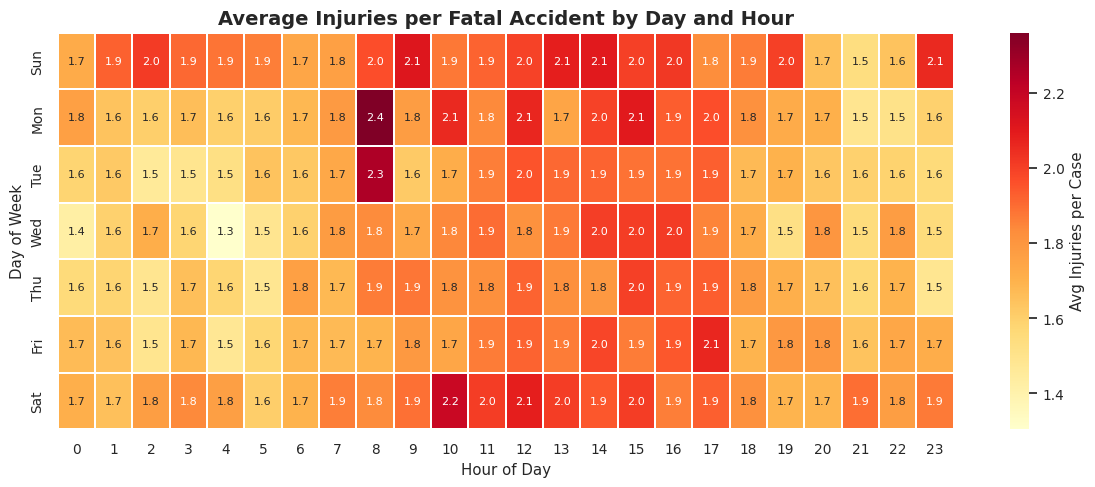

In [12]:
import seaborn as sns

# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Map weekday
week_day = {1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri", 7: "Sat"}
df["DAY_NAME"] = df["DAY_WEEK"].map(week_day)

# Pivot table for average injuries
pivot_avg = df.pivot_table(index="DAY_NAME", columns="HOUR", values="NUM_INJURED", aggfunc="mean")
pivot_avg = pivot_avg.reindex(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

# Rounded annotations
pivot_annot = pivot_avg.round(1)

# Plot
plt.figure(figsize=(12, 5))
sns.set(font_scale=0.9)
ax = sns.heatmap(
    pivot_avg,
    cmap="YlOrRd",
    linewidths=0.3,
    linecolor="white",
    annot=pivot_annot,
    fmt=".1f",
    cbar_kws={"label": "Avg Injuries per Case"},
    annot_kws={"fontsize": 8}
)

plt.title("Average Injuries per Fatal Accident by Day and Hour", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

plt.tight_layout()
plt.savefig("img/avg_injuries_heatmap.png", dpi=300, transparent=True)
plt.show()

## Space

#### Scatter Plot

Note: Only fatal accidents within the contiguous United States are displayed. Incidents in Alaska, Hawaii, and U.S. territories have been excluded for visualization clarity.

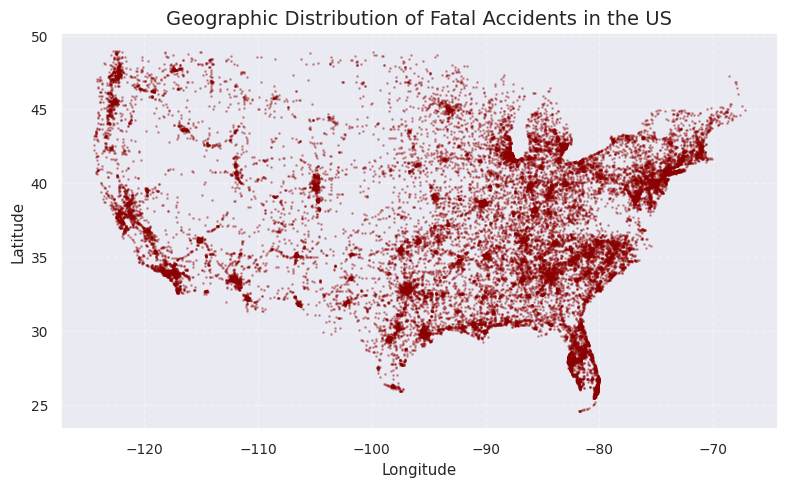

In [13]:
# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")
df = df[(df["LATITUDE"].between(24, 50)) & (df["LONGITUD"].between(-125, -65))]
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df["LONGITUD"], df["LATITUDE"], s=1, alpha=0.3, color="darkred")
plt.title("Geographic Distribution of Fatal Accidents in the US", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig("img/geo_cases_dist.png", dpi=300, transparent=True)
plt.show()

#### Choropleth Map with Top 10 States

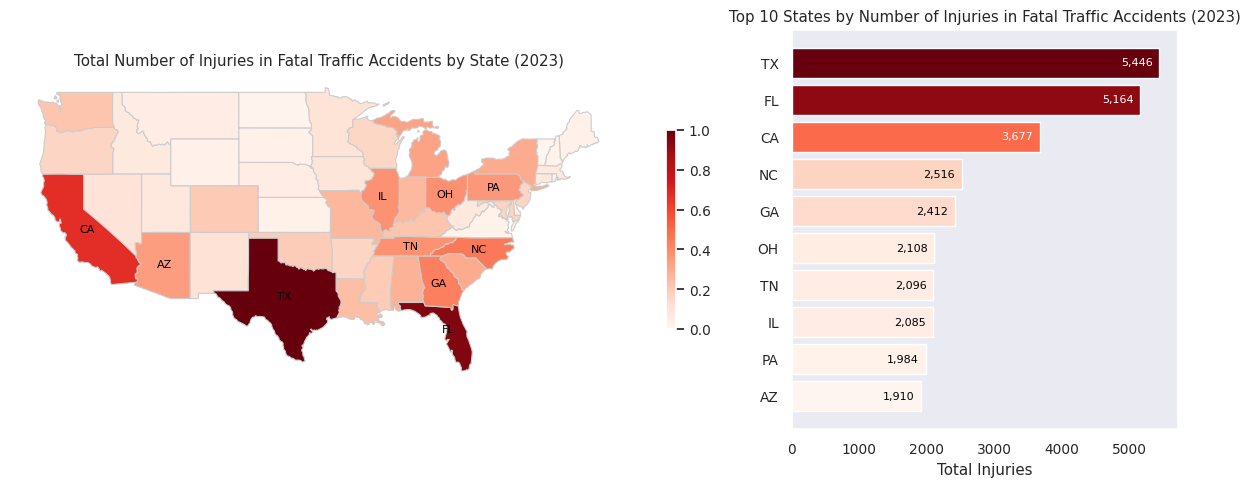

In [14]:
import geopandas as gpd

# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Mapping from FARS state code to full name & abbreviation
state_map = {
    1: ("Alabama", "AL"), 2: ("Alaska", "AK"), 3: ("American Samoa", "AS"), 4: ("Arizona", "AZ"), 5: ("Arkansas", "AR"), 6: ("California", "CA"),
    8: ("Colorado", "CO"), 9: ("Connecticut", "CT"), 10: ("Delaware", "DE"), 11: ("District of Columbia", "DC"),
    12: ("Florida", "FL"), 13: ("Georgia", "GA"), 14: ("Guam", "GU"), 15: ("Hawaii", "HI"), 16: ("Idaho", "ID"), 17: ("Illinois", "IL"),
    18: ("Indiana", "IN"), 19: ("Iowa", "IA"), 20: ("Kansas", "KS"), 21: ("Kentucky", "KY"), 22: ("Louisiana", "LA"),
    23: ("Maine", "ME"), 24: ("Maryland", "MD"), 25: ("Massachusetts", "MA"), 26: ("Michigan", "MI"), 27: ("Minnesota", "MN"),
    28: ("Mississippi", "MS"), 29: ("Missouri", "MO"), 30: ("Montana", "MT"), 31: ("Nebraska", "NE"), 32: ("Nevada", "NV"),
    33: ("New Hampshire", "NH"), 34: ("New Jersey", "NJ"), 35: ("New Mexico", "NM"), 36: ("New York", "NY"),
    37: ("North Carolina", "NC"), 38: ("North Dakota", "ND"), 39: ("Ohio", "OH"), 40: ("Oklahoma", "OK"),
    41: ("Oregon", "OR"), 42: ("Pennsylvania", "PA"), 43: ("Puerto Rico", "PR"), 44: ("Rhode Island", "RI"), 45: ("South Carolina", "SC"),
    46: ("South Dakota", "SD"), 47: ("Tennessee", "TN"), 48: ("Texas", "TX"), 49: ("Utah", "UT"), 50: ("Vermont", "VT"),
    51: ("Virginia", "VA"), 52: ("Virgin Islands", "VI"), 53: ("Washington", "WA"), 54: ("West Virginia", "WV"), 55: ("Wisconsin", "WI"), 56: ("Wyoming", "WY")
}

# Expand state info
df["STATE_NAME"] = df["STATE"].map(lambda x: state_map[x][0])
df["STATE_ABBR"] = df["STATE"].map(lambda x: state_map[x][1])

# Aggregate
state_injuries = df.groupby(["STATE_NAME", "STATE_ABBR"])["NUM_INJURED"].sum().reset_index()

# Load US states GeoJSON
us_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
merged = us_states.merge(state_injuries, left_on="name", right_on="STATE_NAME", how="left")
merged = merged[~merged["name"].isin(["Alaska", "Hawaii"])]

# Get Top 10 states
top10 = state_injuries.sort_values("NUM_INJURED", ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [2, 1]})

# Choropleth map
merged.plot(column="NUM_INJURED", cmap="Reds", linewidth=0.8, ax=axes[0], edgecolor="0.8", legend=False)
axes[0].set_title("Total Number of Injuries in Fatal Traffic Accidents by State (2023)")
axes[0].axis("off")

# Add annotations for top10
top10_abbr = (state_injuries.sort_values("NUM_INJURED", ascending=False).head(10)["STATE_ABBR"].tolist())
for idx, row in merged.iterrows():
    abbr = row["STATE_ABBR"]
    if abbr in top10_abbr:
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        axes[0].text(x, y, abbr, fontsize=8, ha='center', va='center', color='black')

# Colorbar customized
import matplotlib as mpl
sm = plt.cm.ScalarMappable(cmap="Reds")
sm._A = []
cbar = plt.colorbar(sm, ax=axes[0], shrink=0.5)


# Top10 bar chart
import matplotlib.cm as cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=top10["NUM_INJURED"].min(), vmax=top10["NUM_INJURED"].max())
cmap = cm.get_cmap("Reds")
bar_colors = [cmap(norm(value)) for value in top10["NUM_INJURED"]]

axes[1].barh(top10["STATE_ABBR"], top10["NUM_INJURED"], color=bar_colors)
axes[1].invert_yaxis()
axes[1].set_xlabel("Total Injuries")
axes[1].set_title("Top 10 States by Number of Injuries in Fatal Traffic Accidents (2023)")
axes[1].grid(False)
for i, (abbr, fatal) in enumerate(zip(top10["STATE_ABBR"], top10["NUM_INJURED"])):
    color = "white" if i < 3 else "black"
    axes[1].text(fatal - 100, i, f"{fatal:,}", va="center", ha="right", fontsize=8, color=color)

plt.tight_layout()
plt.savefig("img/choropleth_top10.png", dpi=300, transparent=True)
plt.show()

## Road Condition


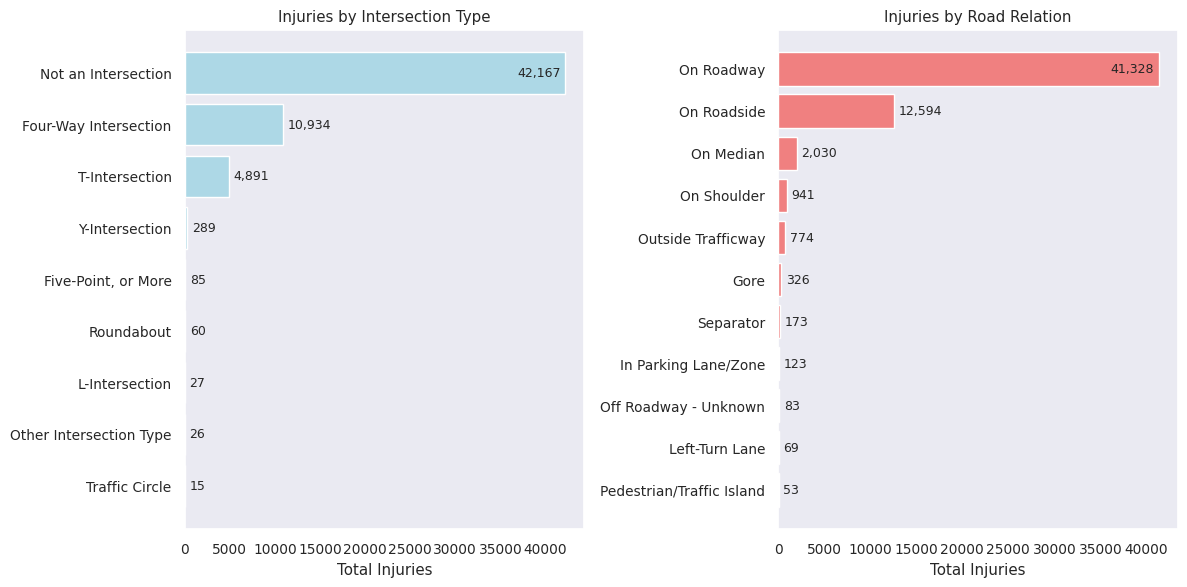

In [15]:
# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Mapping labels
typ_int_map = {
    1: "Not an Intersection", 2: "Four-Way Intersection", 3: "T-Intersection",
    4: "Y-Intersection", 5: "Traffic Circle", 6: "Roundabout", 7: "Five-Point, or More",
    10: "L-Intersection", 11: "Other Intersection Type"
}
rel_road_map = {
    1: "On Roadway",
    2: "On Shoulder",
    3: "On Median",
    4: "On Roadside",
    5: "Outside Trafficway",
    6: "Off Roadway - Unknown",
    7: "In Parking Lane/Zone",
    8: "Gore",
    10: "Separator",
    11: "Left-Turn Lane",
    12: "Pedestrian/Traffic Island"
}

df["TYP_INT_LABEL"] = df["TYP_INT"].map(typ_int_map)
df["REL_ROAD_LABEL"] = df["REL_ROAD"].map(rel_road_map)

# Aggregate total injuries
inj_by_typ = df.groupby("TYP_INT_LABEL")["NUM_INJURED"].sum().sort_values()
inj_by_rel = df.groupby("REL_ROAD_LABEL")["NUM_INJURED"].sum().sort_values()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot TYP_INT
axes[0].barh(inj_by_typ.index, inj_by_typ.values, color="lightblue")
axes[0].set_title("Injuries by Intersection Type")
axes[0].set_xlabel("Total Injuries")

for i, (value, label) in enumerate(zip(inj_by_typ.values, inj_by_typ.index)):
    if i == len(inj_by_typ) - 1:
        axes[0].text(value - 500, i, f"{value:,}", va="center", ha="right", fontsize=9)
    else:
        axes[0].text(value + 500, i, f"{value:,}", va="center", fontsize=9)

# Plot REL_ROAD
axes[1].barh(inj_by_rel.index, inj_by_rel.values, color="lightcoral")
axes[1].set_title("Injuries by Road Relation")
axes[1].set_xlabel("Total Injuries")

for i, (value, label) in enumerate(zip(inj_by_rel.values, inj_by_rel.index)):
    if i == len(inj_by_rel) - 1:
        axes[1].text(value - 500, i, f"{value:,}", va="center", ha="right", fontsize=9)
    else:
        axes[1].text(value + 500, i, f"{value:,}", va="center", fontsize=9)

for ax in axes:
    ax.grid(False)
    ax.set_xlim(left=0)

plt.tight_layout()
plt.savefig("img/road.png", dpi=300, transparent=True)
plt.show()

## External Factors

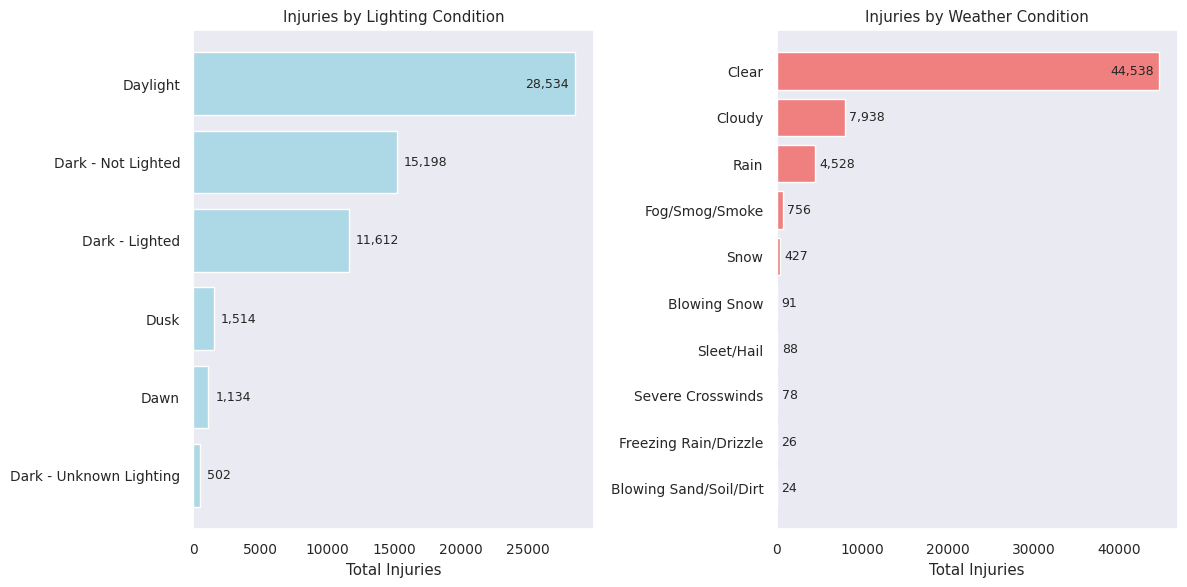

In [16]:
# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Mapping values
lgt_map = {
    1: "Daylight", 2: "Dark - Not Lighted", 3: "Dark - Lighted",
    4: "Dawn", 5: "Dusk", 6: "Dark - Unknown Lighting"
}
weather_map = {
    1: "Clear", 2: "Rain", 3: "Sleet/Hail", 4: "Snow", 5: "Fog/Smog/Smoke",
    6: "Severe Crosswinds", 7: "Blowing Sand/Soil/Dirt", 10: "Cloudy", 11: "Blowing Snow", 12: "Freezing Rain/Drizzle"
}

df["LGT_LABEL"] = df["LGT_COND"].map(lgt_map)
df["WEATHER_LABEL"] = df["WEATHER"].map(weather_map)

# Group & sort
inj_by_lgt = df.groupby("LGT_LABEL")["NUM_INJURED"].sum().sort_values()
inj_by_weather = df.groupby("WEATHER_LABEL")["NUM_INJURED"].sum().sort_values()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lighting condition
axes[0].barh(inj_by_lgt.index, inj_by_lgt.values, color="lightblue")
axes[0].set_title("Injuries by Lighting Condition")
axes[0].set_xlabel("Total Injuries")
for i, (val, label) in enumerate(zip(inj_by_lgt.values, inj_by_lgt.index)):
    if i == len(inj_by_lgt) - 1:
        axes[0].text(val - 500, i, f"{val:,}", ha="right", va="center", fontsize=9)
    else:
        axes[0].text(val + 500, i, f"{val:,}", va="center", fontsize=9)

# Weather condition
axes[1].barh(inj_by_weather.index, inj_by_weather.values, color="lightcoral")
axes[1].set_title("Injuries by Weather Condition")
axes[1].set_xlabel("Total Injuries")
for i, (val, label) in enumerate(zip(inj_by_weather.values, inj_by_weather.index)):
    if i == len(inj_by_weather) - 1:
        axes[1].text(val - 500, i, f"{val:,}", ha="right", va="center", fontsize=9)
    else:
        axes[1].text(val + 500, i, f"{val:,}", va="center", fontsize=9)

# Style
for ax in axes:
    ax.grid(False)
    ax.set_xlim(left=0)

plt.tight_layout()
plt.savefig("img/weather_lgt.png", dpi=300, transparent=True)
plt.show()


## Internal Structure

#### Correlation Matrix

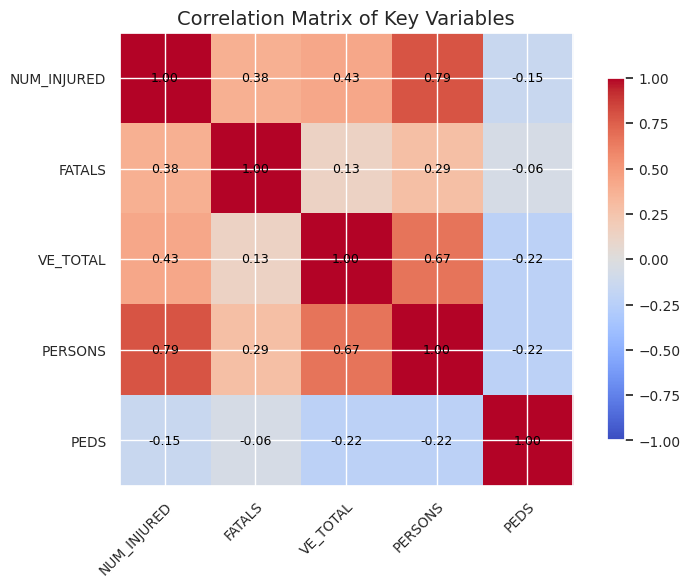

In [17]:
import numpy as np

# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Select numeric variables for correlation
cols_to_use = ["NUM_INJURED", "FATALS", "VE_TOTAL", "PERSONS", "PEDS"]
corr_matrix = df[cols_to_use].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add ticks
ax.set_xticks(np.arange(len(cols_to_use)))
ax.set_yticks(np.arange(len(cols_to_use)))
ax.set_xticklabels(cols_to_use)
ax.set_yticklabels(cols_to_use)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add values
for i in range(len(cols_to_use)):
    for j in range(len(cols_to_use)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                ha="center", va="center", color="black", fontsize=9)

# Title and layout
ax.set_title("Correlation Matrix of Key Variables", fontsize=14)
plt.colorbar(im, ax=ax, shrink=0.8)
plt.tight_layout()
plt.savefig("img/cm.png", dpi=300, transparent=True)
plt.show()


#### Distribution

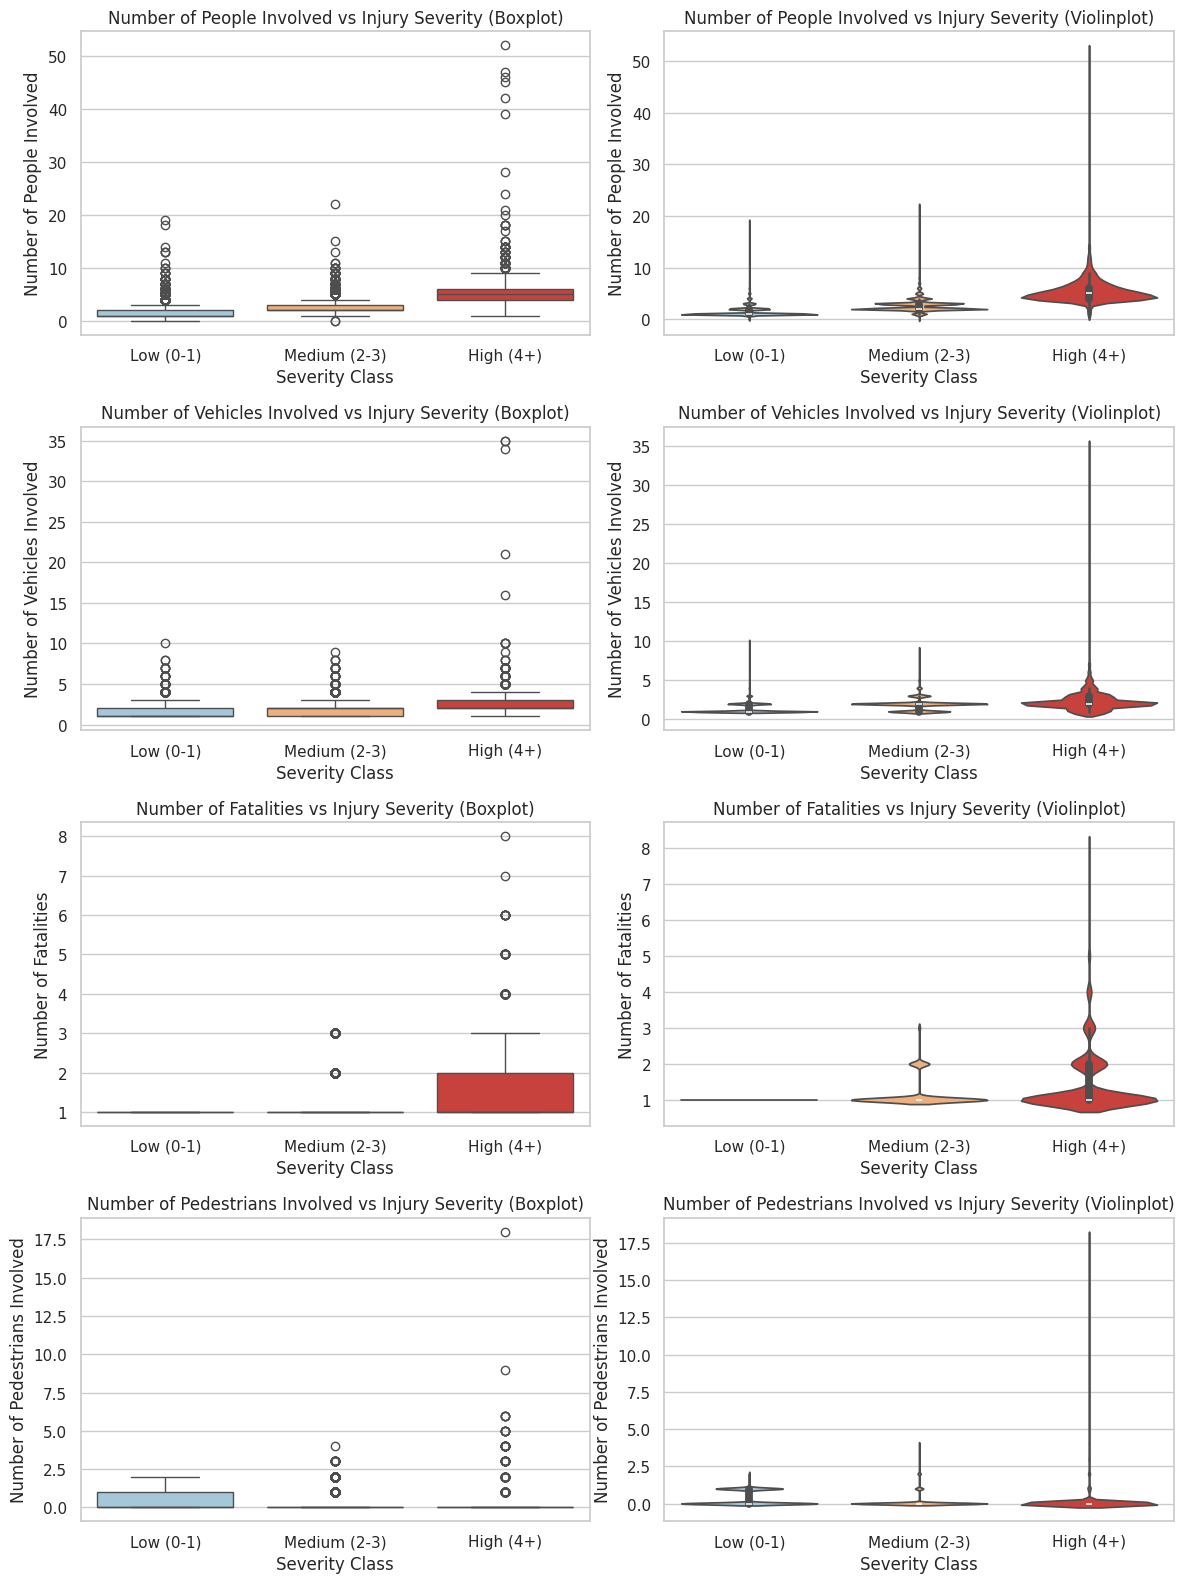

In [18]:
import seaborn as sns

# Load data
df = pd.read_csv("Processed_data/filtered_accident.csv")

# Relabel NUM_INJURED classes
def relabel(row):
    if row in [0, 1]:
        return 0
    elif row in [2, 3]:
        return 1
    elif row >= 4:
        return 2

df["SEVERITY_CLASS"] = df["NUM_INJURED"].apply(relabel)
class_labels = {0: "Low (0-1)", 1: "Medium (2-3)", 2: "High (4+)"}
df["SEVERITY_LABEL"] = df["SEVERITY_CLASS"].map(class_labels)

# Structure-related variables to loop over
structure_vars = ["PERSONS", "VE_TOTAL", "FATALS", "PEDS"]

# Plot settings
name_map = {
    "PERSONS": "Number of People Involved",
    "VE_TOTAL": "Number of Vehicles Involved",
    "FATALS": "Number of Fatalities",
    "PEDS": "Number of Pedestrians Involved"
}

sns.set(style="whitegrid")
n_vars = len(structure_vars)
ncols = 2
nrows = n_vars

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
severity_palette = {
    "Low (0-1)": "#9ecae1",     # light blue
    "Medium (2-3)": "#fdae6b",  # orange
    "High (4+)": "#de2d26"      # strong red
}

for i, var in enumerate(structure_vars):
    pretty_name = name_map[var]
    # Boxplot
    sns.boxplot(x="SEVERITY_LABEL", y=var, data=df, ax=axes[i, 0], palette=severity_palette)
    axes[i, 0].set_title(f"{pretty_name} vs Injury Severity (Boxplot)")
    axes[i, 0].set_xlabel("Severity Class")
    axes[i, 0].set_ylabel(pretty_name)

    # Violinplot
    sns.violinplot(x="SEVERITY_LABEL", y=var, data=df, ax=axes[i, 1], palette=severity_palette)
    axes[i, 1].set_title(f"{pretty_name} vs Injury Severity (Violinplot)")
    axes[i, 1].set_xlabel("Severity Class")
    axes[i, 1].set_ylabel(pretty_name)

plt.tight_layout()
plt.savefig("img/box_vio.png", dpi=300, transparent=True)
plt.show()